<h1 align=middle> Data Science Challenge </h1>
<h3 align=middle> by Benjamin Chissico </h3>

In [29]:
import pandas as pd 
import numpy as np 

import pathlib 
import matplotlib.pyplot as plt 
from ydata_profiling import ProfileReport
import seaborn as sns 
import json 
plt.style.use("seaborn-darkgrid")

C:\Users\Benja\AppData\Local\Temp\ipykernel_12212\3640243086.py:9: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn-darkgrid")


In [2]:
# load data in 

file_path = pathlib.Path().cwd() / "data"/"data.csv"
df = pd.read_csv(file_path) # holds the metadata of the vehicle and the driver


In [31]:
ProfileReport(df,dark_mode=True)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

### Start of the EDA 

In [3]:
print("Lets start with the head of the dataframe to see what we are working with.")
df.head()

Lets start with the head of the dataframe to see what we are working with.


IDpol  ClaimNb  Exposure Area  VehPower  VehAge  DrivAge  BonusMalus  \
0    1.0        1      0.10    D         5       0       55          50   
1    3.0        1      0.77    D         5       0       55          50   
2    5.0        1      0.75    B         6       2       52          50   
3   10.0        1      0.09    B         7       0       46          50   
4   11.0        1      0.84    B         7       0       46          50   

  VehBrand   VehGas  Density Region  
0      B12  Regular     1217    R82  
1      B12  Regular     1217    R82  
2      B12   Diesel       54    R22  
3      B12   Diesel       76    R72  
4      B12   Diesel       76    R72

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 678013 entries, 0 to 678012
Data columns (total 12 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   IDpol       678013 non-null  float64
 1   ClaimNb     678013 non-null  int64  
 2   Exposure    678013 non-null  float64
 3   Area        678013 non-null  object 
 4   VehPower    678013 non-null  int64  
 5   VehAge      678013 non-null  int64  
 6   DrivAge     678013 non-null  int64  
 7   BonusMalus  678013 non-null  int64  
 8   VehBrand    678013 non-null  object 
 9   VehGas      678013 non-null  object 
 10  Density     678013 non-null  int64  
 11  Region      678013 non-null  object 
dtypes: float64(2), int64(6), object(4)
memory usage: 62.1+ MB


In [5]:
df.describe()

IDpol        ClaimNb       Exposure       VehPower  \
count  6.780130e+05  678013.000000  678013.000000  678013.000000   
mean   2.621857e+06       0.053247       0.528750       6.454631   
std    1.641783e+06       0.240117       0.364442       2.050906   
min    1.000000e+00       0.000000       0.002732       4.000000   
25%    1.157951e+06       0.000000       0.180000       5.000000   
50%    2.272152e+06       0.000000       0.490000       6.000000   
75%    4.046274e+06       0.000000       0.990000       7.000000   
max    6.114330e+06      16.000000       2.010000      15.000000   

              VehAge        DrivAge     BonusMalus        Density  
count  678013.000000  678013.000000  678013.000000  678013.000000  
mean        7.044265      45.499122      59.761502    1792.422405  
std         5.666232      14.137444      15.636658    3958.646564  
min         0.000000      18.000000      50.000000       1.000000  
25%         2.000000      34.000000      50.000000      92.000000  
50%         6.000000      44.000000      50.000000     393.000000  
75%        11.000000      55.000000      64.000000    1658.000000  
max       100.000000     100.000000     230.000000   27000.000000

In [6]:
# Check duplicates 
df[df.duplicated()]

Empty DataFrame
Columns: [IDpol, ClaimNb, Exposure, Area, VehPower, VehAge, DrivAge, BonusMalus, VehBrand, VehGas, Density, Region]
Index: []

No duplicates is a good sign

In [7]:
# check data types 


data_types = df.dtypes.reset_index().rename(columns={0:"dataType",'index':'columnName'})
data_types

# check the quality based on nan values 
columns = df.columns.tolist()


Lets check if we can recast some of the "object" fields to a category
We assume that every object field that has less than three different values should be a category

### Important disclaimer!

We will opt for a **binary classification** based on the provided dataset.  
The **goal** will be to identify based on the data if a driver will report a claim or not.

In [8]:
df['ClaimNb'].value_counts(normalize=True)

ClaimNb
0     0.949765
1     0.047459
2     0.002631
3     0.000121
4     0.000010
11    0.000004
5     0.000003
6     0.000001
8     0.000001
16    0.000001
9     0.000001
Name: proportion, dtype: float64

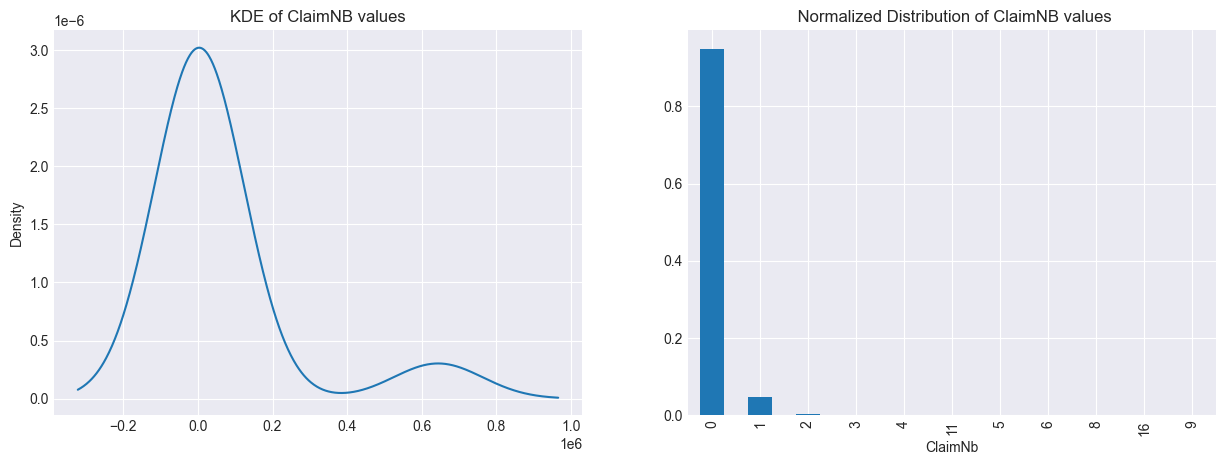

In [9]:
f, axes = plt.subplots(1,2,figsize=(15,5))
df['ClaimNb'].value_counts().plot(kind="kde",title="KDE of ClaimNB values",ax=axes[0])
df['ClaimNb'].value_counts(normalize=True).plot(kind="bar",title=" Normalized Distribution of ClaimNB values",ax=axes[1])
plt.show()

In [10]:
mask = df['ClaimNb']== 0
df.loc[mask,'Y'] = 0
df.loc[~mask,'Y'] = 1

Lets have a quick overview of the distribution of claims vs. no claims 

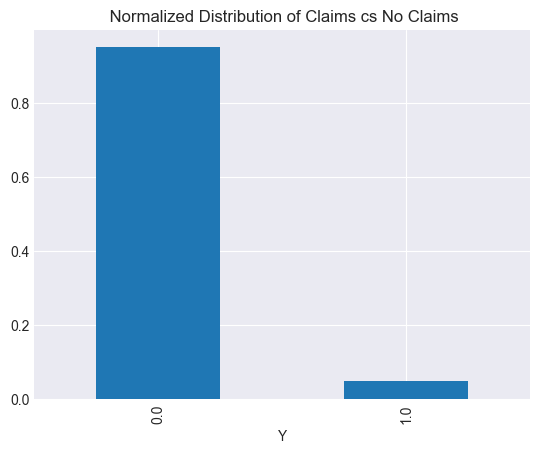

In [11]:
df['Y'].value_counts(normalize=True).plot(kind="bar",title=" Normalized Distribution of Claims cs No Claims")
plt.show()

We have a lot more no claims than we have drivers that had a claim, lets find out what makes a driver "claim"

In [12]:
data_types

columnName dataType
0        IDpol  float64
1      ClaimNb    int64
2     Exposure  float64
3         Area   object
4     VehPower    int64
5       VehAge    int64
6      DrivAge    int64
7   BonusMalus    int64
8     VehBrand   object
9       VehGas   object
10     Density    int64
11      Region   object

In [13]:
cat_mask = data_types['dataType'] == "object"
cat_candidates = data_types.loc[cat_mask].copy()
cat_candidates['columnName']

cats = []
for column in cat_candidates['columnName'].values:
    print(f"Checking Column: {column}")
    values = df.loc[:,column].unique()
    print(f"\tDistinct # of values: {len(values):,}")
    if len(values) <=3:
        cats.append(column)
    
if not cats:
    print("No values found that could be transformed to a category based on our metric"
         )
else:
    print(f"Found these columns that will be transformed to a category: {', '.join(cats)}")
    for cat in cats:
        df[cat] = df[cat].astype('category')

Checking Column: Area
	Distinct # of values: 6
Checking Column: VehBrand
	Distinct # of values: 11
Checking Column: VehGas
	Distinct # of values: 2
Checking Column: Region
	Distinct # of values: 22
Found these columns that will be transformed to a category: VehGas


In [14]:
nan_values = (
    (df
        .isnull()
        .sum() 
        / 
        len(df))
        .reset_index()
        .rename(columns={"index":"columnName",0:"proportionOfNaNValues"})
        .sort_values(by=["proportionOfNaNValues"],ascending=False)

)
nan_values



columnName  proportionOfNaNValues
0        IDpol                    0.0
1      ClaimNb                    0.0
2     Exposure                    0.0
3         Area                    0.0
4     VehPower                    0.0
5       VehAge                    0.0
6      DrivAge                    0.0
7   BonusMalus                    0.0
8     VehBrand                    0.0
9       VehGas                    0.0
10     Density                    0.0
11      Region                    0.0
12           Y                    0.0

*Nice*, looks like we dont have any NAN Values in the DataSet ;) (in the metadata columns, the claim amounts if not always filled) 

Lets have a general look into the data to see what it represents

In [15]:
# Helper Function 
def analyse_column(series:pd.Series)->None:
    """Helper Function that allows to analyse a specific column"""
    print(f"Analysing of {series.name!r}")

    distinct_values = series.unique()
    print(f"Count of values: {len(distinct_values)}")
    if len(distinct_values) <= 20:
        
        distinct_dct = {'Column':series.name,'data':distinct_values.tolist()}

        print(json.dumps(distinct_dct,indent=2))
    print("\n\n")
    #print(f"Distinct values in the column: {', '.join(distinct_values)}")

In [16]:
_ = df.apply(analyse_column)

Analysing of 'IDpol'
Count of values: 678013



Analysing of 'ClaimNb'
Count of values: 11
{
  "Column": "ClaimNb",
  "data": [
    1,
    2,
    4,
    3,
    11,
    0,
    5,
    6,
    8,
    16,
    9
  ]
}



Analysing of 'Exposure'
Count of values: 187



Analysing of 'Area'
Count of values: 6
{
  "Column": "Area",
  "data": [
    "D",
    "B",
    "E",
    "C",
    "F",
    "A"
  ]
}



Analysing of 'VehPower'
Count of values: 12
{
  "Column": "VehPower",
  "data": [
    5,
    6,
    7,
    4,
    9,
    15,
    8,
    10,
    12,
    11,
    14,
    13
  ]
}



Analysing of 'VehAge'
Count of values: 78



Analysing of 'DrivAge'
Count of values: 83



Analysing of 'BonusMalus'
Count of values: 115



Analysing of 'VehBrand'
Count of values: 11
{
  "Column": "VehBrand",
  "data": [
    "B12",
    "B6",
    "B3",
    "B2",
    "B5",
    "B10",
    "B14",
    "B13",
    "B4",
    "B1",
    "B11"
  ]
}



Analysing of 'VehGas'
Count of values: 2
{
  "Column": "VehGas",
  "data": [

## Let the plotting begin!

<Axes: >

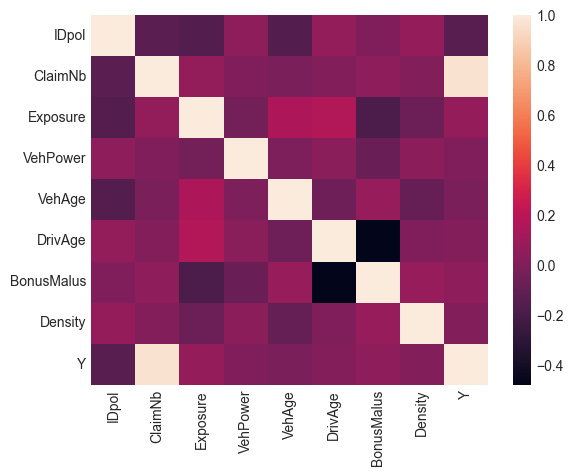

In [17]:
corr = df.corr(numeric_only=True)
sns.heatmap(corr)

In [18]:
# lets have a look at the data that has a higher than .5  or less than -.5 percent correlation
def colorize_cell(cell:float|int):
    pass 
corr.style.applymap(lambda cell : 'color:green' if cell >.4 else 'color:blue' if cell <-.4 else '')

Hmm looks like we dont have a lot of correlation going on. 
We found a negative correlation between the driver's age and the BonusMalus level. 
This makes sense, because in most cases, young drivers have a higher BonusMalus then older drivers

**One Important Task**:  
For the final analysis we need to exclude the 'ClaimNb'. 

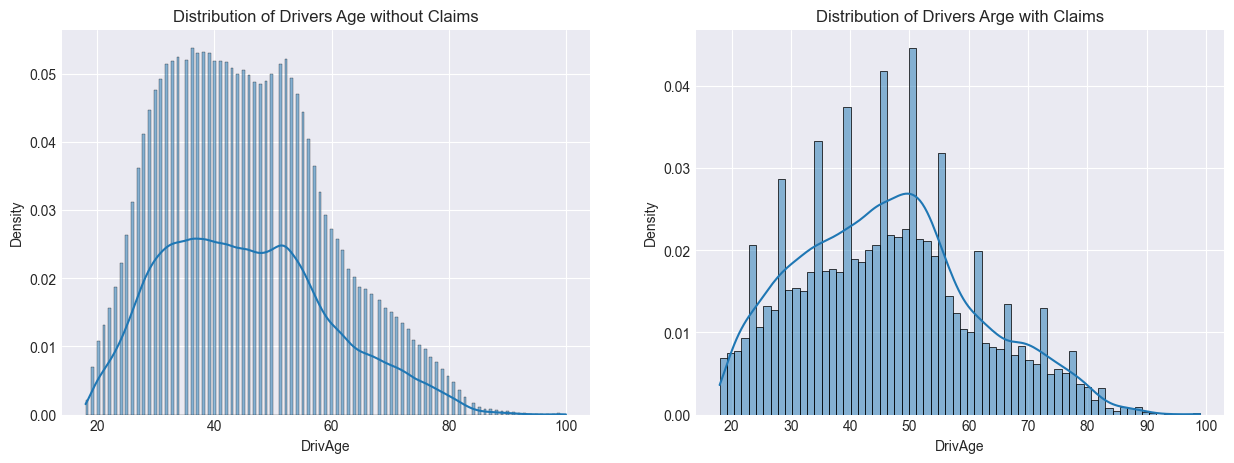

In [19]:
## Plot Age distribution from claims drivers vs non claims driver
mask = df.Y == 0 
f,axes = plt.subplots(1,2,figsize=(15,5))
sns.histplot(data=df.loc[mask],x='DrivAge',ax=axes[0],kde=True,stat="density")
sns.histplot(data=df.loc[~mask],x='DrivAge',ax=axes[1],kde=True,stat="density")
axes[0].set_title("Distribution of Drivers Age without Claims")
axes[1].set_title("Distribution of Drivers Arge with Claims")
plt.show()



<h6 align=middle>The histplot analysis of driving ages reveals a leftward skew, indicating a higher concentration of younger drivers</h6>

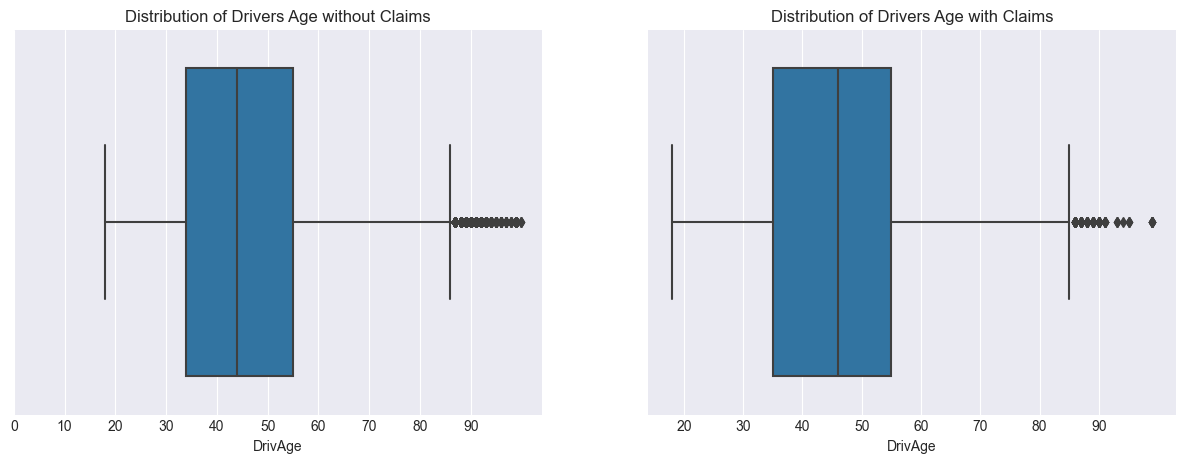

In [20]:
# looking at the outliers of the drivers age ranges 
mask = df.Y == 0 
f,axes = plt.subplots(1,2,figsize=(15,5))
sns.boxplot(data=df.loc[mask],x='DrivAge',ax=axes[0])
axes[0].set_xticks(range(0,100,10))
axes[1].set_xticks(range(0,100,10))

sns.boxplot(data=df.loc[~mask],x='DrivAge',ax=axes[1])
axes[0].set_title("Distribution of Drivers Age without Claims")
axes[1].set_title("Distribution of Drivers Age with Claims")
plt.show()



## BonusMalus

lets do the same exercise for the Bonus Malus

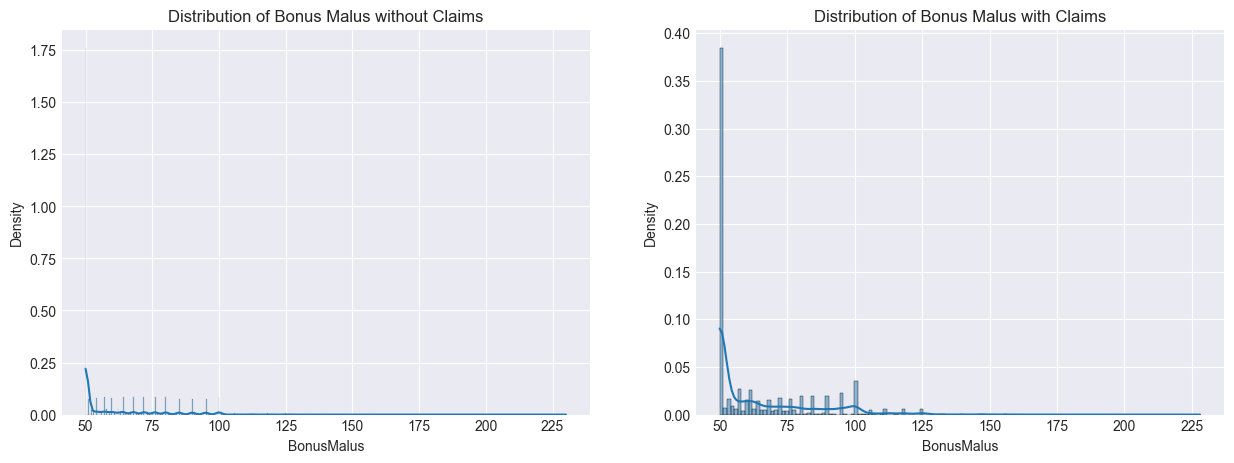

In [21]:
mask = df.Y == 0 
f,axes = plt.subplots(1,2,figsize=(15,5))
sns.histplot(data=df.loc[mask],x='BonusMalus',ax=axes[0],kde=True,stat="density")
sns.histplot(data=df.loc[~mask],x='BonusMalus',ax=axes[1],kde=True,stat="density")
axes[0].set_title("Distribution of Bonus Malus without Claims")
axes[1].set_title("Distribution of Bonus Malus with Claims")
plt.show()

okay, not really helpful. We figured that the Bonus Malus

In [22]:
Y_COLS = ['ClaimAmount','Y','IDpol','ClaimNb']
columns_to_check = [col for col in df.columns.tolist() if col not in Y_COLS]

## BE CAREFUL!
Running the pairplot might take a long time, so only re-run this part if absolutely necessary!

In [23]:
columns_to_check

['Exposure',
 'Area',
 'VehPower',
 'VehAge',
 'DrivAge',
 'BonusMalus',
 'VehBrand',
 'VehGas',
 'Density',
 'Region']

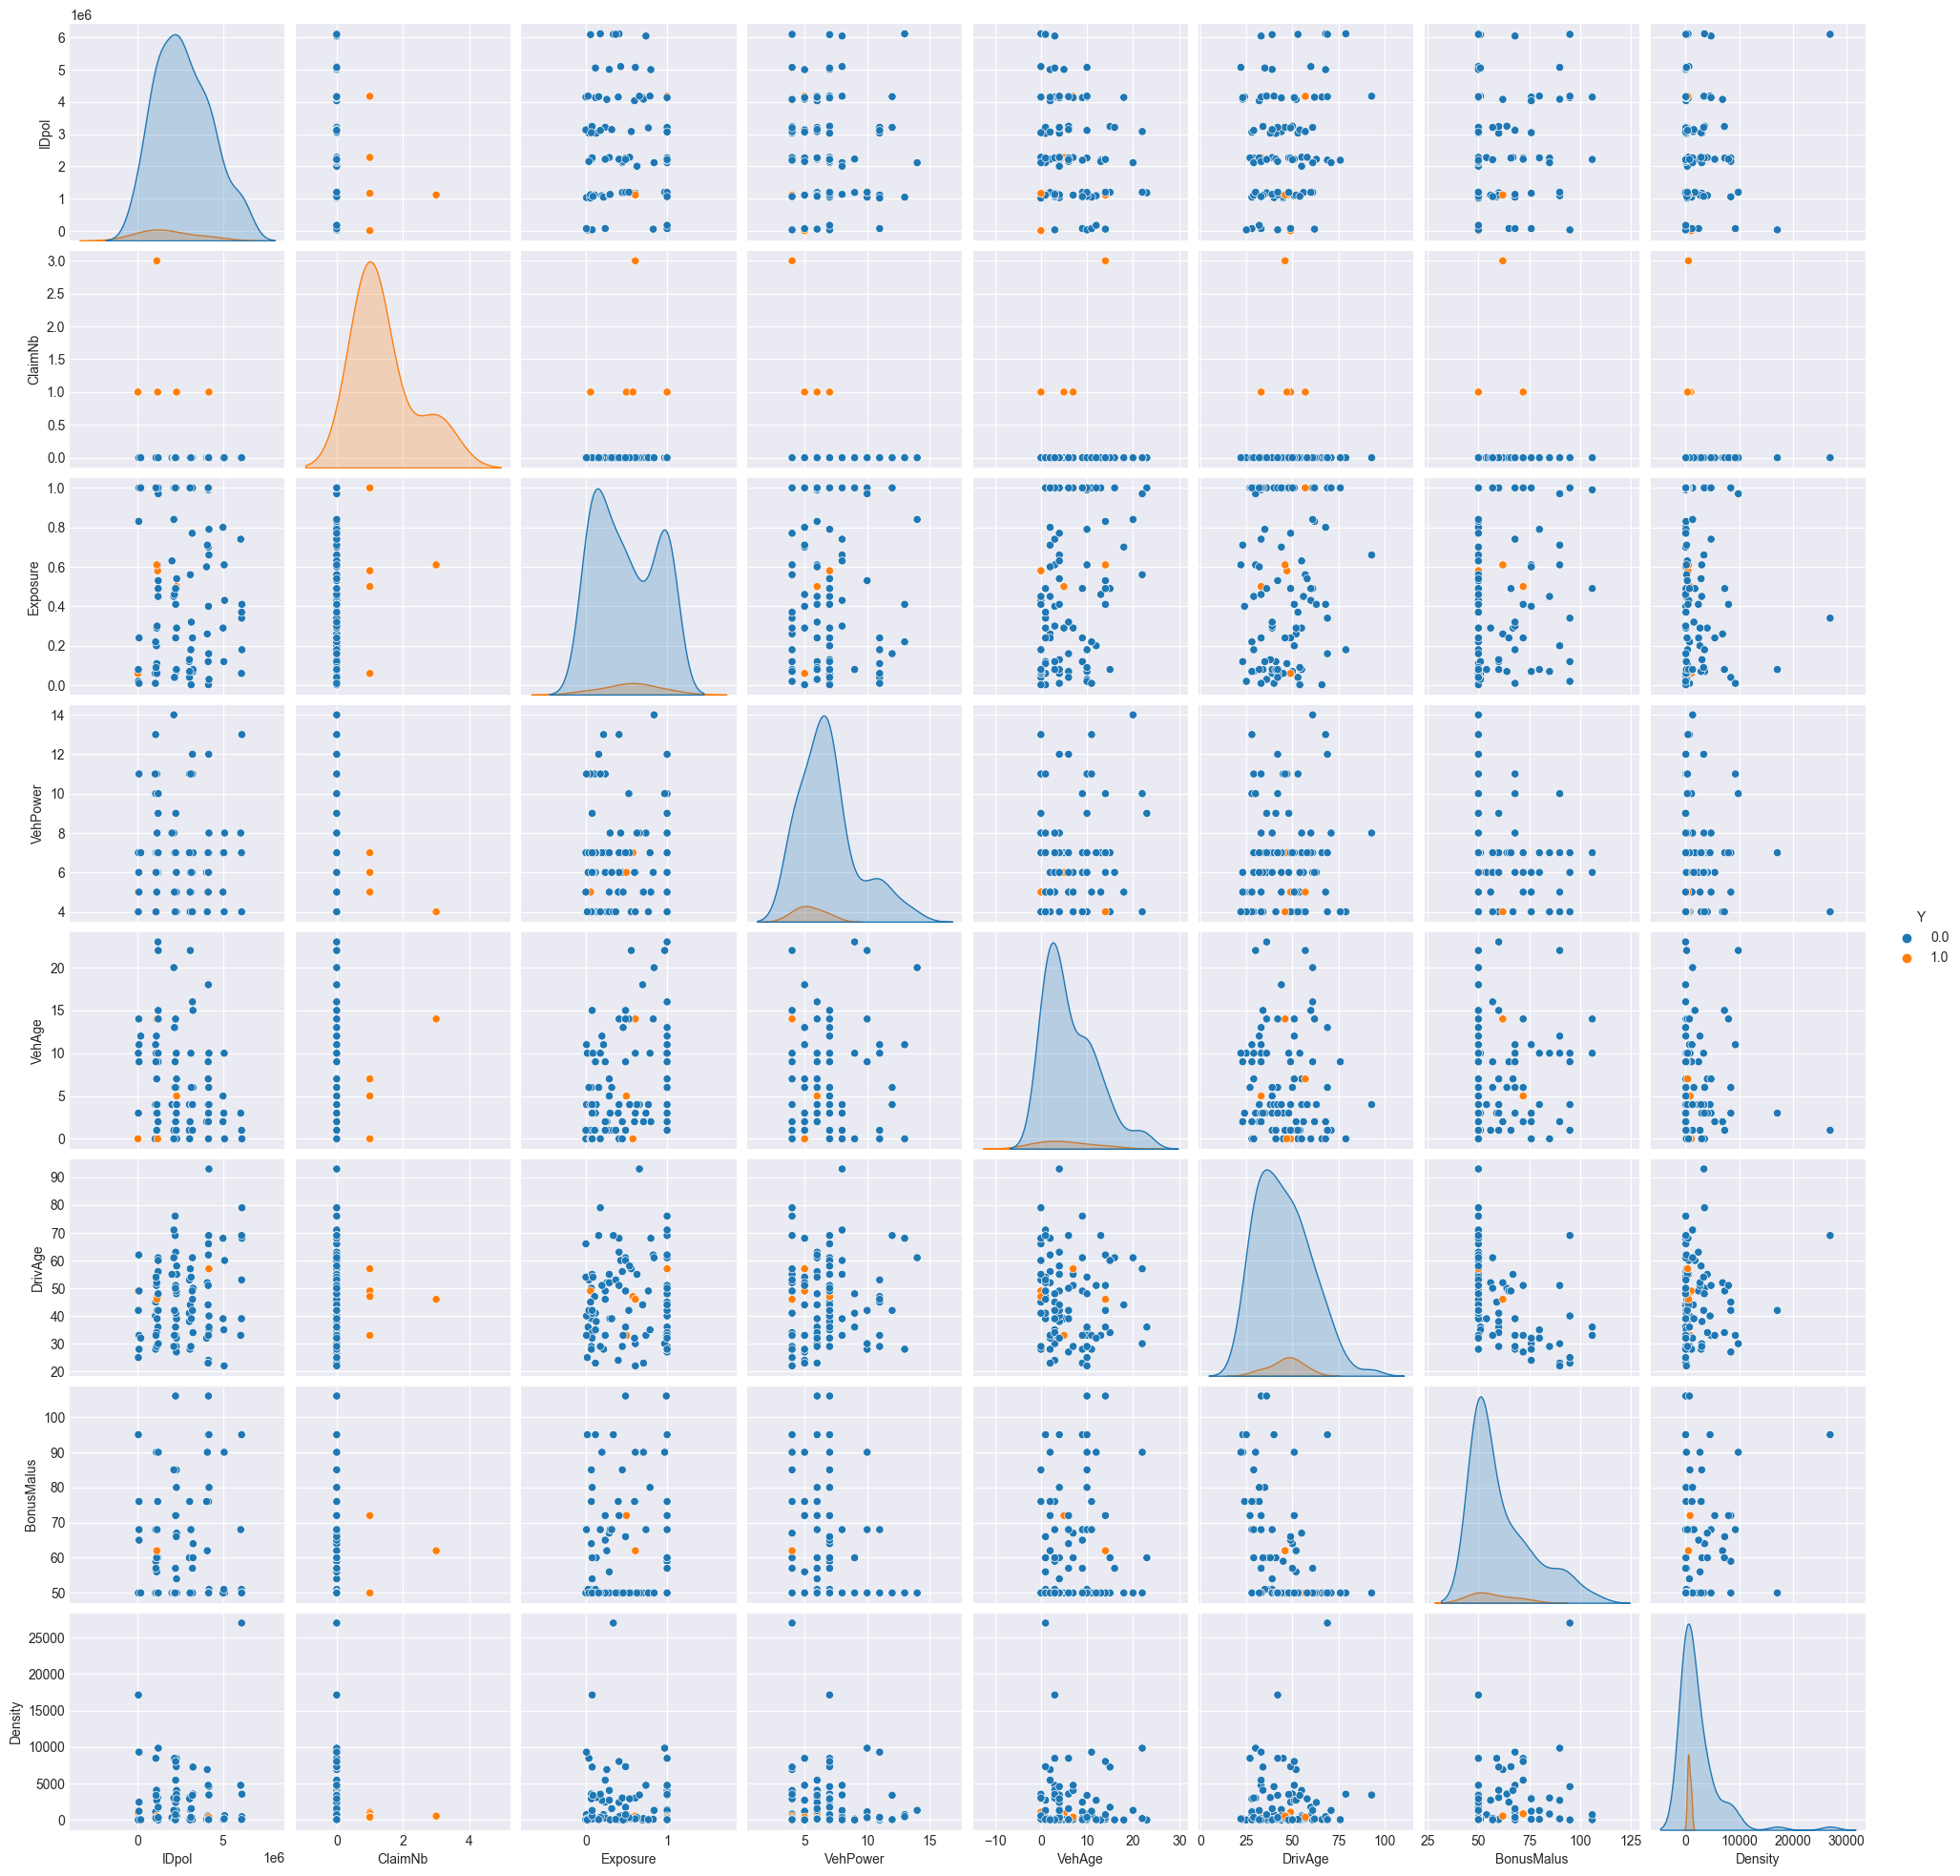

In [24]:
pair_plot = sns.pairplot(data=df.sample(100),hue="Y")
# pair_plot.fig.set_size_inches(10,30)
pair_plot.tight_layout()

At the first glance, nothing out of the ordinary, thats why we go deeper in and check values on a bigger canvas 

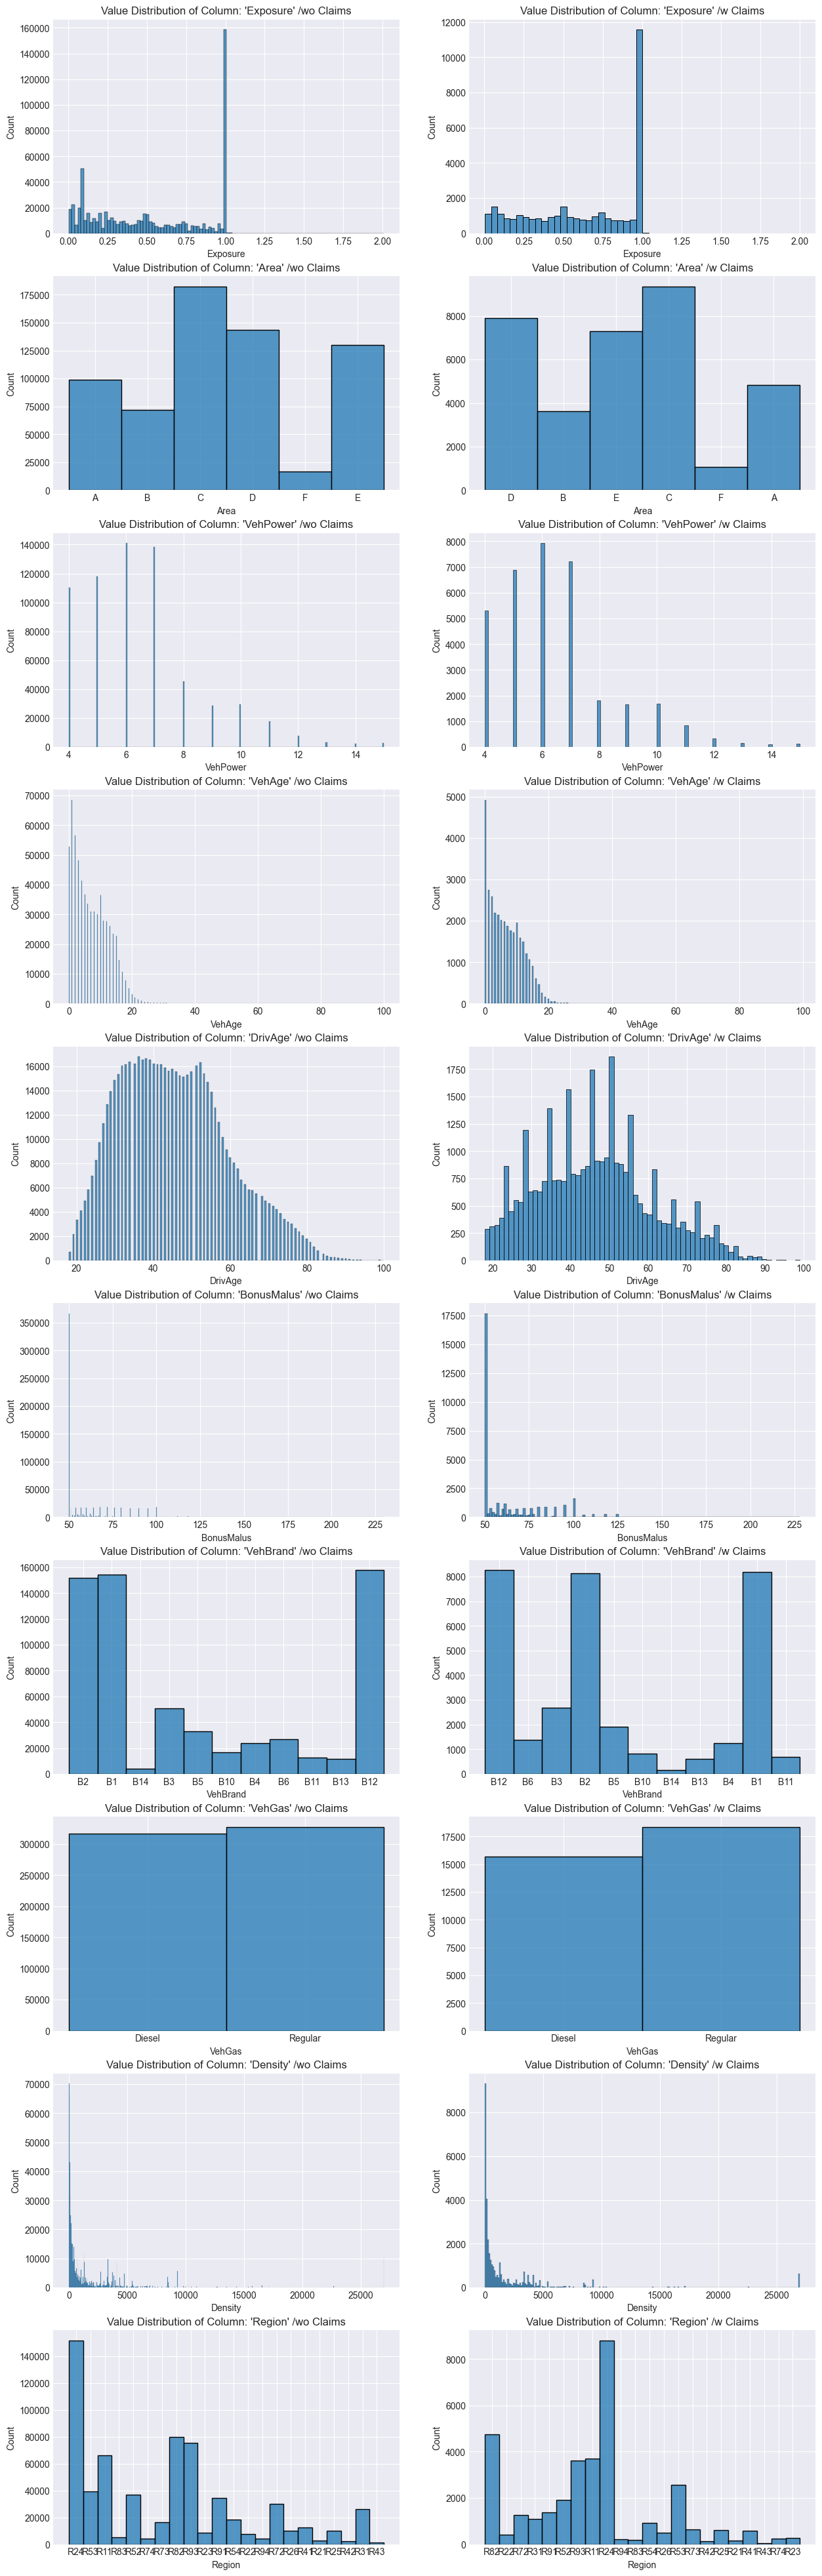

In [25]:
f , axes = plt.subplots(len(columns_to_check),2,figsize=(15,50))


for idx,column in enumerate(columns_to_check):
    sns.histplot(data=df.loc[mask],x=column,ax=axes[idx][0])
    sns.histplot(data=df.loc[~mask],x=column,ax=axes[idx][1])
    axes[idx][0].set_title(f"Value Distribution of Column: {column!r} /wo Claims")
    axes[idx][1].set_title(f"Value Distribution of Column: {column!r} /w Claims")
    

plt.show()

All rendered graphes don't look particular suspicious. 
However, BonusMalus and VehicleAge look definitely interesting.  
The lower the BonusMalus the higher the claims number (by a big margin). 
Furthermore, a lot of vehicle damages apparently occur in mostly in the first.  

## Next Steps 

Preparation of feature engineering.  


In [26]:
columns_to_check.append('Y') # we take out the ClaimNb column

In [27]:

save_path = pathlib.Path().cwd() / "output"/"pre-processed"
if not save_path.exists():
    save_path.mkdir(parents=True)
df.loc[:,columns_to_check].to_pickle(save_path/"eda-data.pkl")